# Projet 5: Segmentez des clients d'un site e-commerce

## Nettoyage et analyse exploratoire.

### Sommaire

- <a href="#C1">Description de la mission</a>

- <a href="#C2">Importation du jeu de données</a>

- <a href="#C3">Feature engineering</a>

- <a href="#C4">K_means</a>
   
- <a href="#C5">Stabilité du K-means</a>
   
- <a href="#C6">Agglomerative Clustering</a>

- <a href="#C7">DBSCAN</a>

- <a href="#C8">Review et temps de livraison</a>

## <a name ='C1'>Description de la mission</a>

Votre mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Vous utiliserez donc des méthodes non supervisées pour regrouper des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe Marketing pour mieux communiquer.

Vous créez donc un notebook et démarrez votre travail d’analyse exploratoire.


Après quelques premières analyses, vous vous rendez compte qu’Olist ne vous a pas fourni beaucoup de données ; vous enquêtez donc auprès de l’entreprise pour obtenir quelques informations complémentaires, et vérifier que vous avez bien compris la mission. Voici sa réponse

## <a name='C2'> Importation du jeu de données<a/>

In [39]:
%load_ext pycodestyle_magic

ModuleNotFoundError: No module named 'pycodestyle_magic'

In [40]:
%pycodestyle_on

UsageError: Line magic function `%pycodestyle_on` not found.


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import MeanShift, estimate_bandwidth, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import metrics
from matplotlib import cm
from time import time
from sklearn.pipeline import Pipeline, make_pipeline
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from kmodes.kprototypes import KPrototypes

In [43]:
df_rfm = pd.read_csv('rfm').drop(columns='Unnamed: 0')

In [44]:
df_rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89
...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,4134.84
93392,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58
93393,ffff371b4d645b6ecea244b27531430a,573,1,112.46
93394,ffff5962728ec6157033ef9805bacc48,124,1,133.69


In [45]:
df_rfm_review = pd.read_csv('rfm_review').drop(columns='Unnamed: 0')

In [46]:
df_rfm_review

,customer_unique_id,Recency,Frequency,Monetary,review
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4.0
2,0000f46a3911fa3c0805444483337064,542,1,86.22,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,4.0
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,5.0
...,...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,4134.84,5.0
93392,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58,4.0
93393,ffff371b4d645b6ecea244b27531430a,573,1,112.46,5.0
93394,ffff5962728ec6157033ef9805bacc48,124,1,133.69,5.0


In [47]:
df_rfm_review['Frequency'].unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 15])

In [48]:
df_rfm_delivery = pd.read_csv(
    'rfm_review_with_delivery').drop(columns='Unnamed: 0')

In [49]:
df_rfm_delivery

,customer_unique_id,Recency,Frequency,Monetary,review,TimeToDeliveryinDays
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,5.0,6.41
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4.0,3.29
2,0000f46a3911fa3c0805444483337064,542,1,86.22,3.0,25.73
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,4.0,20.04
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,5.0,13.14
...,...,...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,4134.84,5.0,27.51
93392,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58,4.0,30.10
93393,ffff371b4d645b6ecea244b27531430a,573,1,112.46,5.0,14.87
93394,ffff5962728ec6157033ef9805bacc48,124,1,133.69,5.0,11.86


## <a name='C3'>Feature engineering<a/>

In [50]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    plt.show()
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

/Users/matrice/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


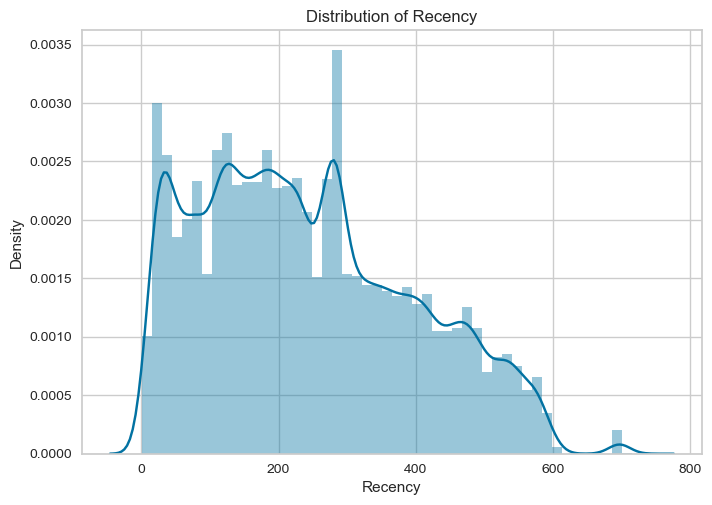

Recency's: Skew: 0.4525743664936904, : SkewtestResult(statistic=53.91755466635981, pvalue=0.0)


/Users/matrice/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


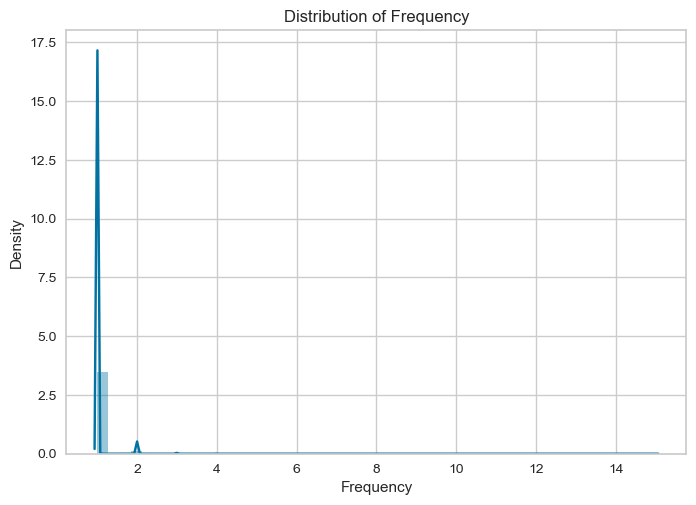

Frequency's: Skew: 10.990942154921314, : SkewtestResult(statistic=335.6456861541721, pvalue=0.0)


/Users/matrice/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


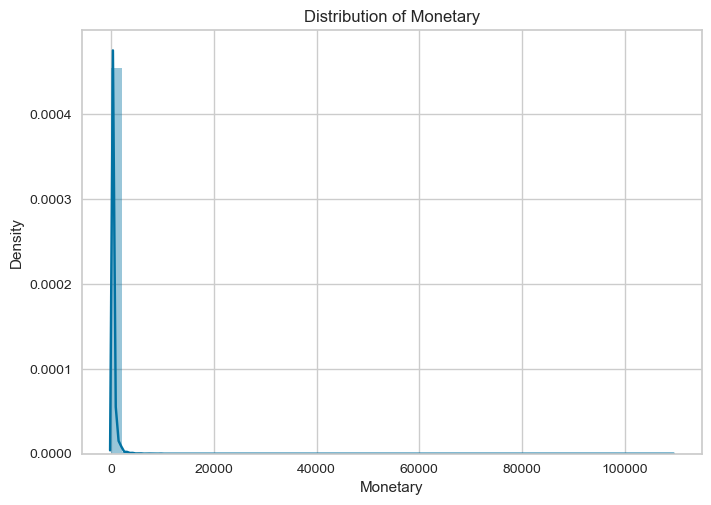

Monetary's: Skew: 70.33621193560055, : SkewtestResult(statistic=524.6379205104615, pvalue=0.0)


In [51]:
for col in df_rfm.columns[1:]:
    check_skew(df_rfm, col)

In [52]:
df_rfm_log = df_rfm.copy()
for c in df_rfm.columns[2:]:
    df_rfm_log[c] = np.log10(df_rfm_log[c])

/Users/matrice/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


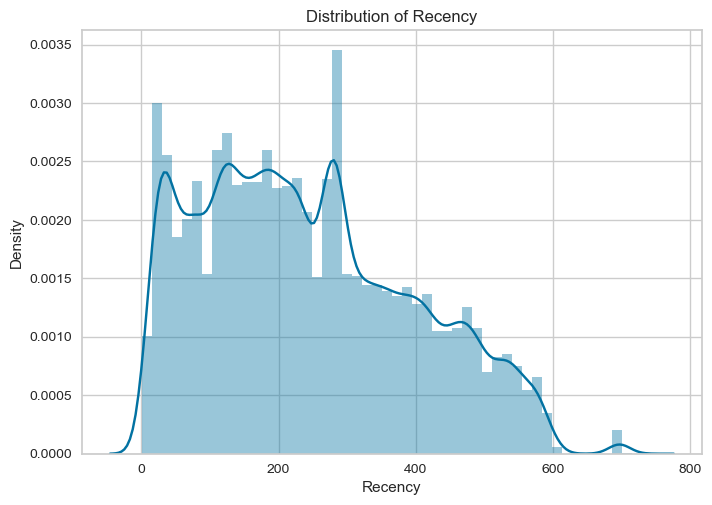

Recency's: Skew: 0.4525743664936904, : SkewtestResult(statistic=53.91755466635981, pvalue=0.0)


/Users/matrice/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


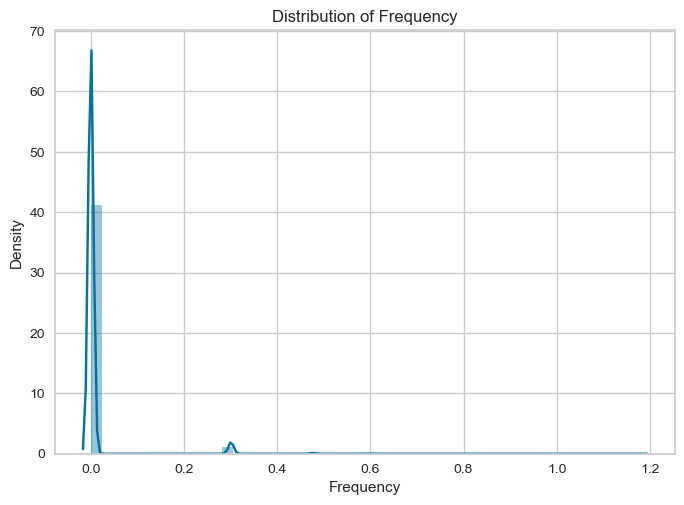

Frequency's: Skew: 6.068294981630156, : SkewtestResult(statistic=275.4417097222108, pvalue=0.0)


/Users/matrice/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


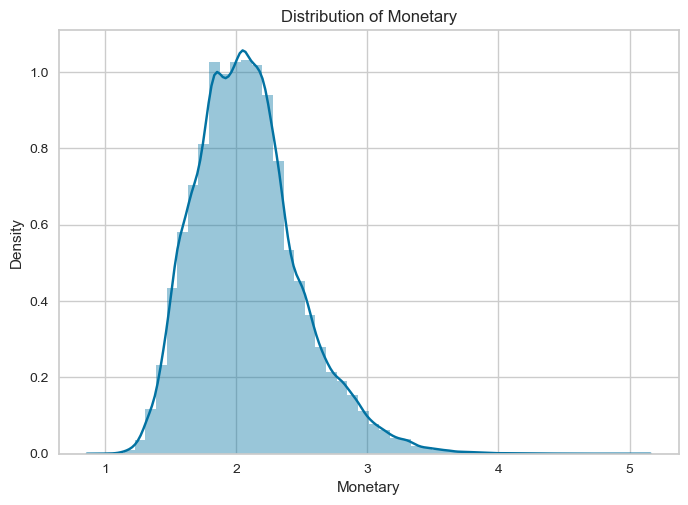

Monetary's: Skew: 0.729609897634013, : SkewtestResult(statistic=81.9204555191681, pvalue=0.0)


In [53]:
for col in df_rfm.columns[1:]:
    check_skew(df_rfm_log, col)

In [54]:
scaler = StandardScaler()
scaler.fit(df_rfm_log.drop("customer_unique_id", axis=1))
RFM_Table_scaled = scaler.transform(
    df_rfm_log.drop("customer_unique_id", axis=1))
# Put data into a df
RFM_Table_scaled = pd.DataFrame(
    RFM_Table_scaled, columns=df_rfm_log.columns[1:])

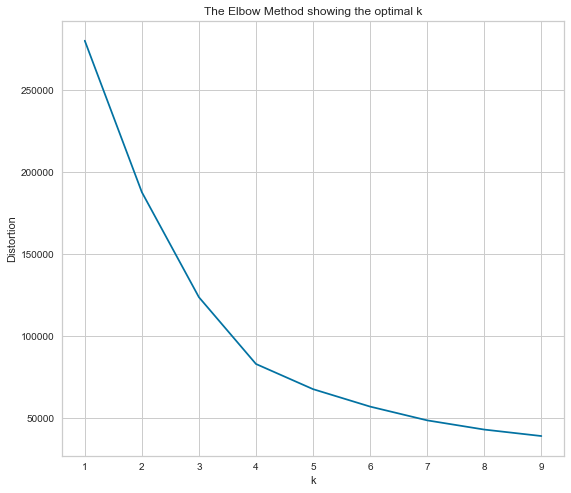

In [16]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(RFM_Table_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(9, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [56]:
X = RFM_Table_scaled.iloc[:, :].values
X

array([[-0.82685836, -0.17243861,  0.16427428],
       [-0.80727157, -0.17243861, -1.63577449],
       [ 1.95446471, -0.17243861, -0.3785058 ],
       ...,
       [ 2.15686146, -0.17243861, -0.08904719],
       [-0.77462694, -0.17243861,  0.099345  ],
       [ 1.60843156, -0.17243861, -0.58153984]])

In [57]:
RFM_Table_scaled

,Recency,Frequency,Monetary
0,-0.826858,-0.172439,0.164274
1,-0.807272,-0.172439,-1.635774
2,1.954465,-0.172439,-0.378506
3,0.544216,-0.172439,-1.120834
4,0.328762,-0.172439,0.521090
...,...,...,...
93391,1.366861,-0.172439,3.837947
93392,0.159010,-0.172439,-0.399428
93393,2.156861,-0.172439,-0.089047
93394,-0.774627,-0.172439,0.099345


## <a name ='C4'>K-means</a>

In [19]:
kmean_model = KMeans(n_clusters=4, random_state=5)
kmean_y = kmean_model.fit_predict(X)
# Add labels to df
df_rfm['Cluster'] = kmean_model.labels_
kmean_model.cluster_centers_[:]

array([[-0.6299124 , -0.17243861, -0.57587156],
       [-0.11096973,  5.5650308 ,  0.95474674],
       [ 1.19779794, -0.17243861, -0.23291474],
       [-0.31692535, -0.17243861,  1.18986382]])

In [20]:
X

array([[-0.82685836, -0.17243861,  0.16427428],
       [-0.80727157, -0.17243861, -1.63577449],
       [ 1.95446471, -0.17243861, -0.3785058 ],
       ...,
       [ 2.15686146, -0.17243861, -0.08904719],
       [-0.77462694, -0.17243861,  0.099345  ],
       [ 1.60843156, -0.17243861, -0.58153984]])

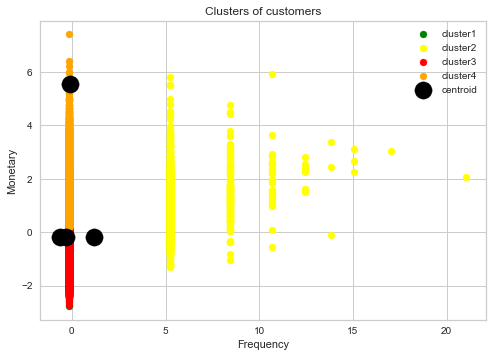

In [21]:
plt.scatter(
    X[kmean_y == 0, 1], X[kmean_y == 0, 2], c='green', label='cluster1')
plt.scatter(
    X[kmean_y == 1, 1], X[kmean_y == 1, 2], c='yellow', label='cluster2')
plt.scatter(
    X[kmean_y == 2, 1], X[kmean_y == 2, 2], c='red', label='cluster3')
plt.scatter(
    X[kmean_y == 3, 1], X[kmean_y == 3, 2], c='orange', label='cluster4')
plt.scatter(
    kmean_model.cluster_centers_[:, 0],
    kmean_model.cluster_centers_[:, 1],
    s=300, c='black', label='centroid')
plt.title('Clusters of customers')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend()
plt.show()

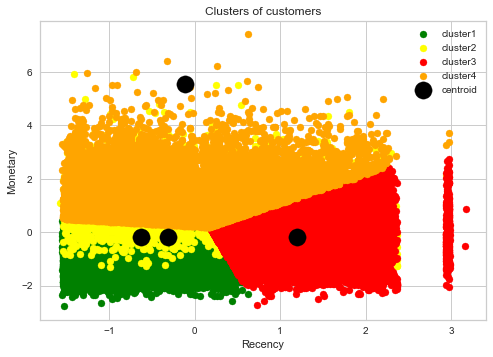

In [22]:
plt.scatter(
    X[kmean_y == 0, 0], X[kmean_y == 0, 2], c='green', label='cluster1')
plt.scatter(
    X[kmean_y == 1, 0], X[kmean_y == 1, 2], c='yellow', label='cluster2')
plt.scatter(
    X[kmean_y == 2, 0], X[kmean_y == 2, 2], c='red', label='cluster3')
plt.scatter(
    X[kmean_y == 3, 0], X[kmean_y == 3, 2], c='orange', label='cluster4')
plt.scatter(
    kmean_model.cluster_centers_[:, 0],
    kmean_model.cluster_centers_[:, 1],
    s=300, c='black', label='centroid')
plt.title('Clusters of customers')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()
plt.show()

In [23]:
df_rfm

,customer_unique_id,Recency,Frequency,Monetary,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,0
2,0000f46a3911fa3c0805444483337064,542,1,86.22,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,3
...,...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,4134.84,3
93392,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58,0
93393,ffff371b4d645b6ecea244b27531430a,573,1,112.46,2
93394,ffff5962728ec6157033ef9805bacc48,124,1,133.69,0


In [24]:
(df_rfm['Frequency'] == 1).value_counts()

True     90589
False     2807
Name: Frequency, dtype: int64

In [25]:
def rfm_values(df):
    df_new = df.groupby(['Cluster']).agg({
            'Recency': 'mean',
            'Frequency': 'mean',
            'Monetary': ['mean', 'count']
        }).round(0)

    return df_new

In [26]:
rfm_values(df_rfm)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         146.0       1.0     82.0  40300
1         226.0       2.0    488.0   2807
2         426.0       1.0    124.0  27541
3         194.0       1.0    521.0  22748

In [27]:
silhouette_score(X, kmean_model.labels_, metric='euclidean')

0.3782200125492917

For n_clusters = 2 The average silhouette_score is : 0.7132442115594848
For n_clusters = 3 The average silhouette_score is : 0.3615429196232618
For n_clusters = 4 The average silhouette_score is : 0.37806673761348025
For n_clusters = 5 The average silhouette_score is : 0.35390804640450085
For n_clusters = 6 The average silhouette_score is : 0.3418456629244958
For n_clusters = 7 The average silhouette_score is : 0.355692334796004
For n_clusters = 8 The average silhouette_score is : 0.3477024756613535
For n_clusters = 9 The average silhouette_score is : 0.34752206887362536


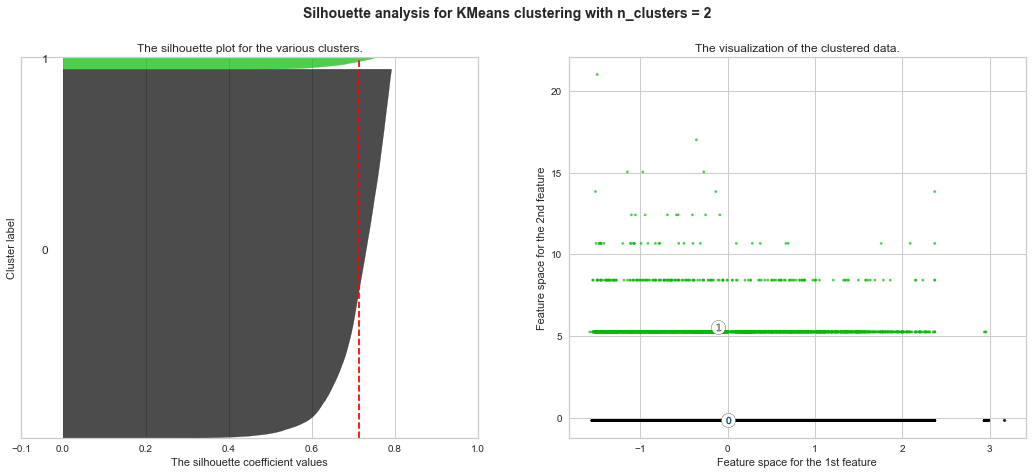

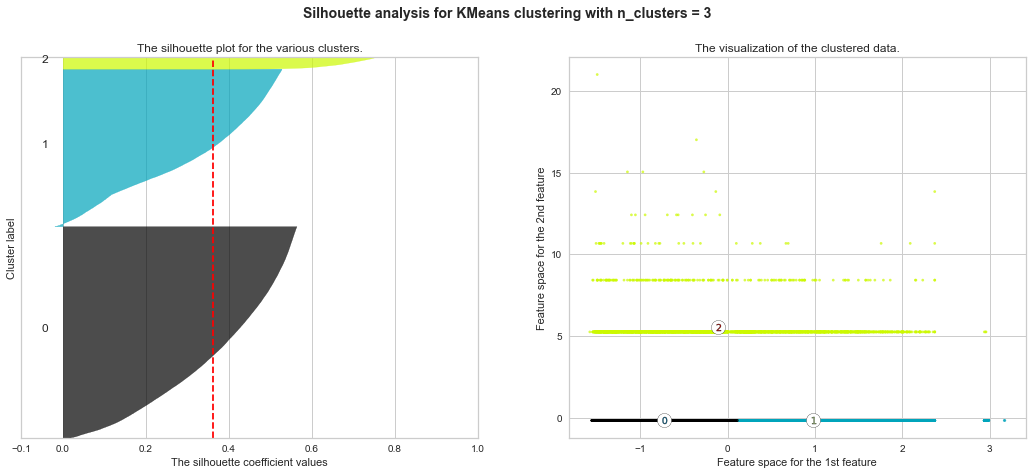

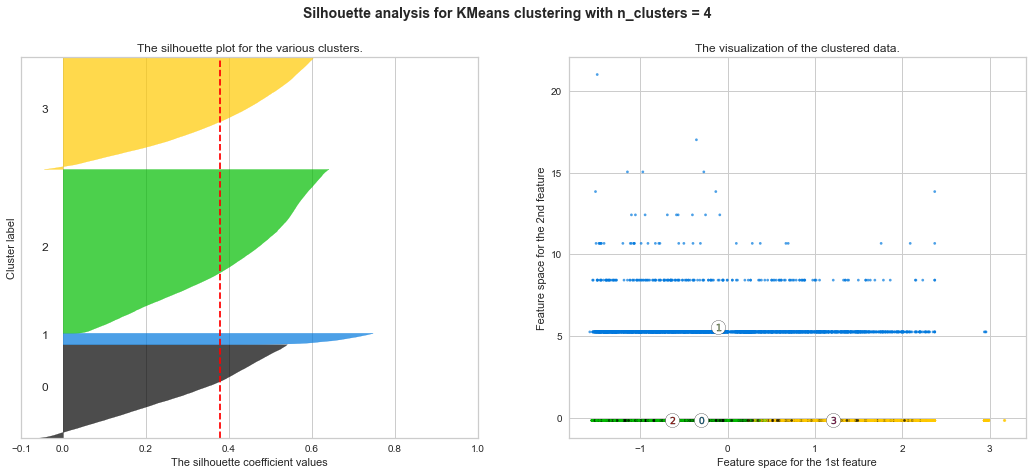

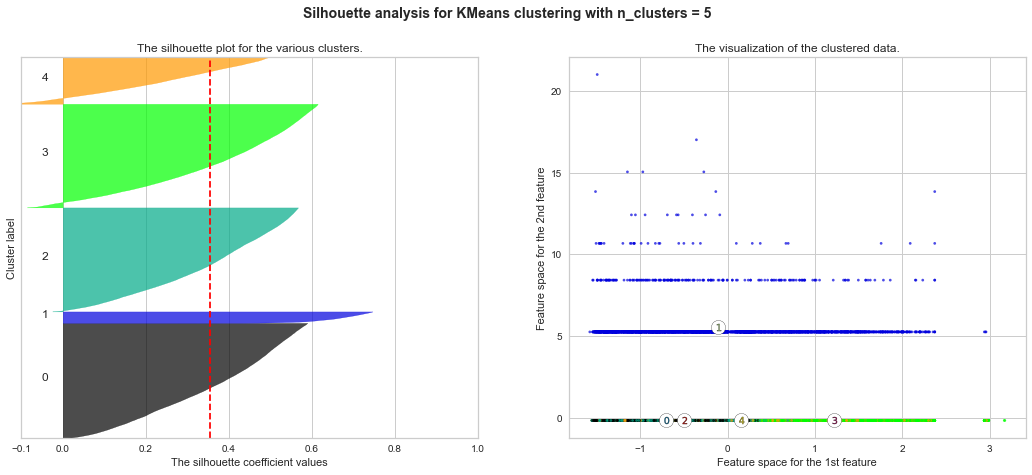

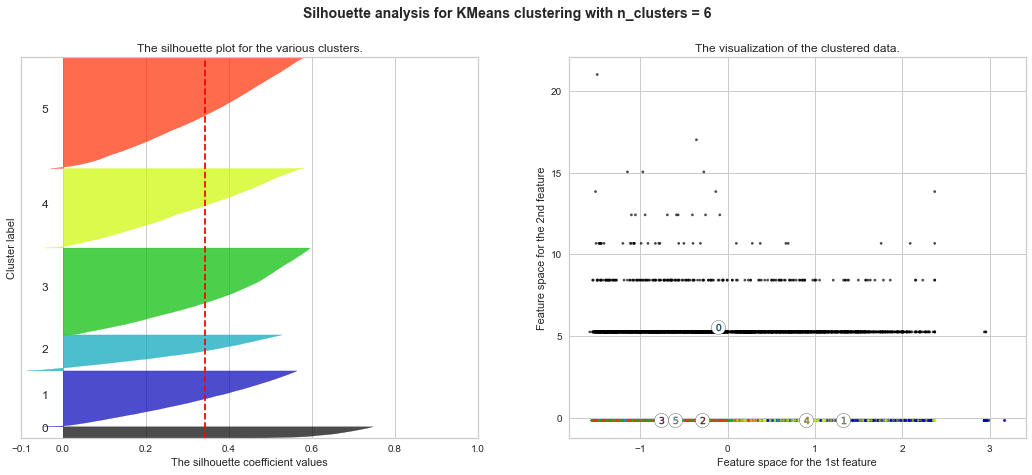

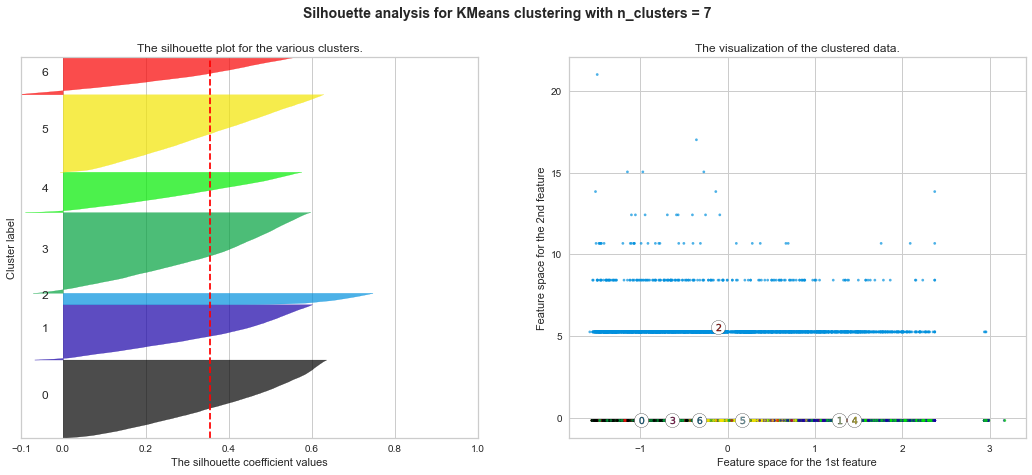

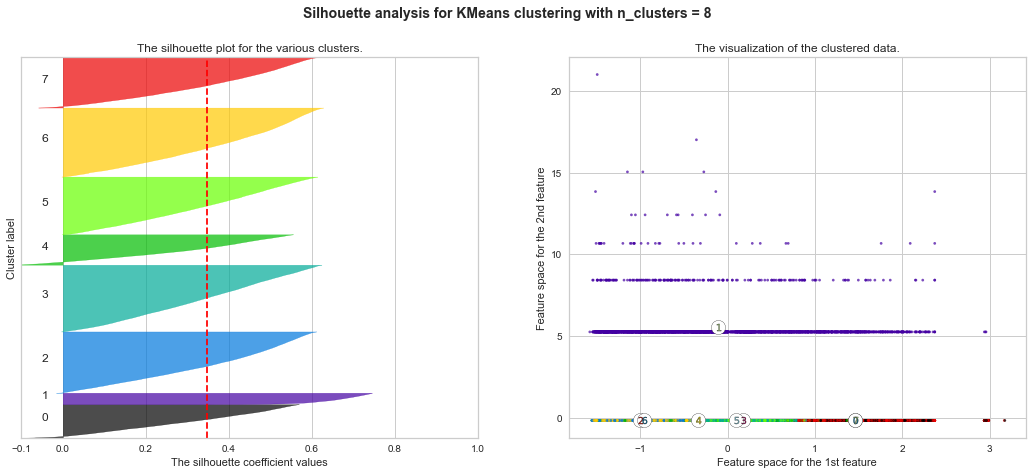

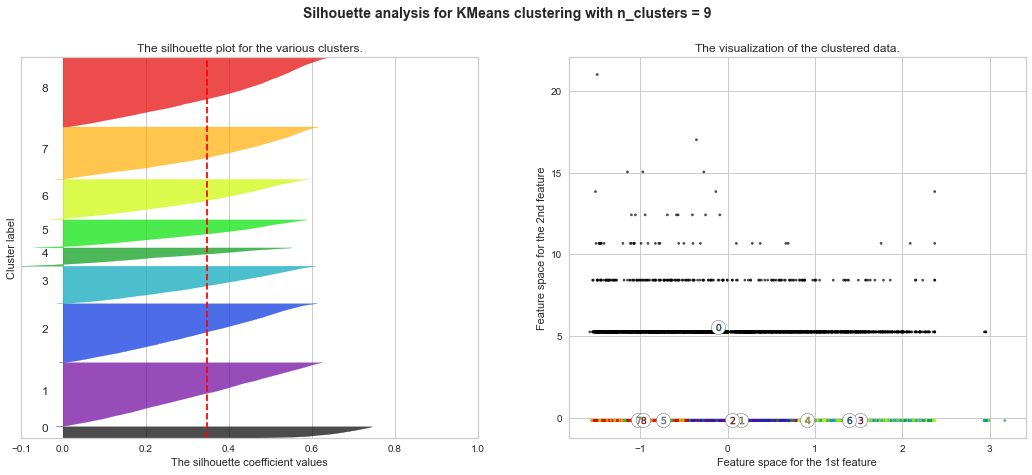

In [28]:
for k in range(2, 10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values = ith
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(
        X[:, 0],
        X[:, 1],
        marker=".",
        s=30,
        lw=0,
        alpha=0.7,
        c=colors,
        edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0],
                    c[1],
                    marker="$%d$" % i,
                    alpha=1,
                    s=50,
                    edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering with n_clusters = %d"
        % k,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


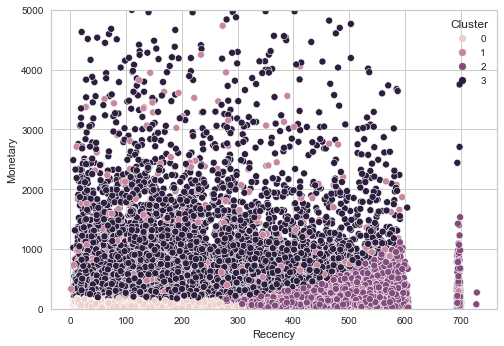

In [29]:
sns.scatterplot(
    df_rfm['Recency'],
    df_rfm['Monetary'],
    hue=df_rfm['Cluster'],
    legend='full')
plt.ylim(0, 5000)
plt.show()

In [30]:
df_rfm

,customer_unique_id,Recency,Frequency,Monetary,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,0
2,0000f46a3911fa3c0805444483337064,542,1,86.22,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,3
...,...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,4134.84,3
93392,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58,0
93393,ffff371b4d645b6ecea244b27531430a,573,1,112.46,2
93394,ffff5962728ec6157033ef9805bacc48,124,1,133.69,0


In [31]:
X

array([[-0.82685836, -0.17243861,  0.16427428],
       [-0.80727157, -0.17243861, -1.63577449],
       [ 1.95446471, -0.17243861, -0.3785058 ],
       ...,
       [ 2.15686146, -0.17243861, -0.08904719],
       [-0.77462694, -0.17243861,  0.099345  ],
       [ 1.60843156, -0.17243861, -0.58153984]])

In [58]:
from time import time
dt = time()
clustering_model = KMeans(
    n_clusters=4)
clustering_model.fit(X)
# Predicting clusters
clustering_prediction = clustering_model.fit_predict(X)
ft = time()
t_kmeans = ft - dt
k_kmeans = silhouette_score(X,
                     clustering_model.labels_,
                     metric='euclidean')
print("Le silhouette score de KMeans pour 4 clusters est",k,"et le temps d'exécution est",ft-dt)

Le silhouette score de KMeans pour 4 clusters est 0.7026368400628227 et le temps d'exécution est 0.8383731842041016


## <a name ='C5'>Stabilité du K-means</a>

In [32]:
def bench_k_means(model, name, data, labels):
    t0 = time()
    estimator = model.fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator.inertia_]

    # Test differents metrics on pred labels
    clustering_metrics = [homogeneity_score,
                          adjusted_rand_score,
                          adjusted_mutual_info_score]
    results += [m(labels, estimator.labels_) for m in clustering_metrics]

    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [33]:
%pycodestyle_off
def clustering_eval(preprocessor,
                    model,
                    data,
                    metric,
                    elbow=True,
                    mds=False,
                    KBest=None):

    if((elbow == True) & (mds == True)):
        ncols=3
    elif((elbow == False) | (mds == False)):
        ncols=2
    else:
        ncols=1
        
    fig, axes = plt.subplots(nrows=1,
                             ncols=ncols,
                             sharex=False,
                             sharey=False,
                             figsize=(24,8))

    ax=0
    if(elbow == True):
        # Elbow visualizer
        kmeans_visualizer = Pipeline([
            ("preprocessor", preprocessor),
            ("kelbowvisualizer", KElbowVisualizer(model,
                                                  K=(4,12),
                                                  metric=metric,
                                                  ax=axes[ax]))])
        kmeans_visualizer.fit(data)
        KBest = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_
        kmeans_visualizer.named_steps['kelbowvisualizer'].finalize()
        ax+=1

    # Set best K
    K = KBest
    model.set_params(n_clusters=K)

    # Silhouette Visualizer
    silhouette_visualizer = Pipeline([
        ("preprocessor", preprocessor),
        ("silhouettevisualizer", SilhouetteVisualizer(model, ax=axes[ax]))])
    silhouette_visualizer.fit(data)
    silhouette_visualizer.named_steps['silhouettevisualizer'].finalize()
    ax+=1

    # Intercluster distance Map with best k
    if(mds==True):
        distance_visualizer = Pipeline([
            ("preprocessor", preprocessor),
            ("distancevisualizer", InterclusterDistance(model, ax=axes[ax]))])
        distance_visualizer.fit(data)
        distance_visualizer.named_steps['distancevisualizer'].finalize()

    return K
    plt.show()
%pycodestyle_on

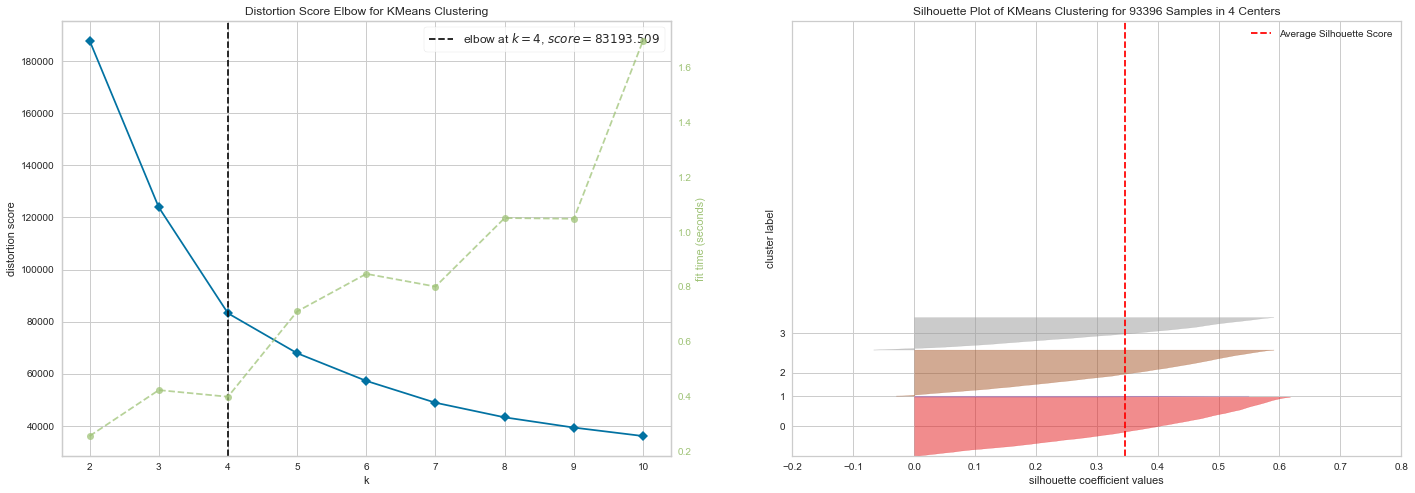

In [34]:
K = clustering_eval(preprocessor=scaler,
                    model=KMeans(),
                    data=df_rfm_log.drop("customer_unique_id", axis=1),
                    metric="distortion",
                    elbow=True,
                    mds=False,
                    KBest=None)

In [35]:
print("Scores de stabilité à l'initialisation")
print(53 * '_')
print('Iteration\tFitTime\tInertia\tHomo\tARI\tAMI')
print(53 * '_')

for i in range(10):
    imodel = KMeans(n_clusters=K, n_init=1, init="k-means++")
    bench_k_means(model=imodel, name="Iter "+str(i),
                  data=RFM_Table_scaled, labels=kmean_model.labels_)

print(53 * '_')

Iter 0   	0.854s	83197	0.964	0.978	0.963
Iter 1   	0.240s	83197	0.964	0.979	0.964
Iter 2   	0.048s	83193	0.978	0.987	0.977
Iter 3   	0.105s	83197	0.964	0.977	0.963
Iter 4   	0.080s	83197	0.965	0.979	0.965
Iter 5   	0.116s	83198	0.962	0.976	0.961
Iter 6   	0.058s	83196	0.968	0.980	0.967
Iter 7   	0.068s	83194	0.972	0.984	0.972
Iter 8   	0.055s	83192	0.985	0.992	0.985
Iter 9   	0.073s	83196	0.965	0.978	0.964
_____________________________________________________


## <a name ='C6'>Agglomérative Clustering</a>

On prend 25% des lignes au hasard (si pas assez de puissance de calcul), on doit stratifier pour bien avoir les 3% de clients qui ont réalisé plusieurs commandes dans notre échantillon

In [59]:
several_command = []
for i in df_rfm['Frequency']:
    if i > 1:
        several_command.append(1)
    else:
        several_command.append(0)

In [60]:
df_rfm['several'] = several_command

In [61]:
df_rfm

,customer_unique_id,Recency,Frequency,Monetary,several
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,0
2,0000f46a3911fa3c0805444483337064,542,1,86.22,0
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,0
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,0
...,...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,4134.84,0
93392,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58,0
93393,ffff371b4d645b6ecea244b27531430a,573,1,112.46,0
93394,ffff5962728ec6157033ef9805bacc48,124,1,133.69,0


In [62]:
X = df_rfm.drop(columns=['several', 'Cluster'])
y = df_rfm['several']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25)

In [64]:
X_test = X_test.reset_index()

In [65]:
X_test = X_test.drop(columns='index')

In [66]:
X_log = X_test.copy()
for c in X.columns[1:4]:
    X_log[c] = np.log10(X_log[c])

In [67]:
X_log

,customer_unique_id,Recency,Frequency,Monetary
0,f259e5c4bc72ef41db0a04654b763da2,2.340444,0.0,2.742222
1,6a2e8efa9b01f6e303f8303232405a65,1.255273,0.0,2.517288
2,cb473287ca9bb51049f0f09e4e1fb7bc,2.652246,0.0,1.432809
3,e21393db40e3ab3e880958fa055b5fc9,2.655138,0.0,2.079145
4,10fa17d3bc4b4692b85cbf224a3392b0,2.558709,0.0,1.685652
...,...,...,...,...
23344,413ce1f9ef6d348584397f99571faccc,2.695482,0.0,1.686815
23345,a734a69f6f4be90c1db54693cf7d0d4a,2.445604,0.0,2.067963
23346,bdf10f125e125adbd467cbca77d80ab4,2.220108,0.0,1.613313
23347,c055ef87c7194b7a6e3a986b2923b9eb,2.021189,0.0,2.053271


In [68]:
scaler_sample = StandardScaler()
scaler_sample.fit(X_log.drop("customer_unique_id", axis=1))
X_scaled = scaler_sample.transform(X_log.drop("customer_unique_id", axis=1))
# Put data into a df
X_scaled = pd.DataFrame(X_scaled, columns=X_log.columns[1:])

In [34]:
X_scaled

,Recency,Frequency,Monetary
0,0.620239,-0.172605,-0.164854
1,-0.551877,-0.172605,-0.179666
2,1.006283,-0.172605,0.466535
3,0.410289,-0.172605,0.069699
4,-0.473909,-0.172605,-0.280743
...,...,...,...
23344,-0.041835,-0.172605,0.135772
23345,1.167442,-0.172605,0.906281
23346,0.917445,-0.172605,0.439796
23347,0.756914,-0.172605,-0.897892


In [47]:
for i in range(2, 11):
    clustering_model = AgglomerativeClustering(n_clusters=i,
                                               affinity='euclidean',
                                               linkage='ward')
    clustering_model.fit(X_scaled)
    clustering_prediction = clustering_model.fit_predict(X_scaled)
    a = silhouette_score(
        X_test.drop(
            columns='customer_unique_id'),
            clustering_prediction,
            metric='euclidean')
    print('Le silhouette score pour', i, 'clusters est', a)

Le silhouette score pour 2 clusters est 0.33214731458155367
Le silhouette score pour 3 clusters est 0.0599782906169011
Le silhouette score pour 4 clusters est 0.1966761654184428
Le silhouette score pour 5 clusters est 0.1371490126117756
Le silhouette score pour 6 clusters est 0.07257367723630742
Le silhouette score pour 7 clusters est 0.0510975446866411
Le silhouette score pour 8 clusters est 0.02943164795893205
Le silhouette score pour 9 clusters est 0.06639110302406198


10:13: E131 8
11:13: E131 8


Le silhouette score pour 10 clusters est 0.06483285759489622


On voit que comme avec K-means, on obtient le meilleur score pour 4 clusters

In [69]:
# AgglomerativeClustering Model initialization
dt = time()
clustering_model = AgglomerativeClustering(
    n_clusters=4, affinity='euclidean', linkage='ward')
clustering_model.fit(X_scaled)
# Predicting clusters
clustering_prediction = clustering_model.fit_predict(X_scaled)
ft = time()
t_agglo = ft - dt
k_agglo = silhouette_score(X_scaled,
                     clustering_model.labels_,
                     metric='euclidean')
print("Le silhouette score de l'AgglomerativeClustering pour 4 clusters est",k,"et le temps d'exécution est",ft-dt)

Le silhouette score de l'AgglomerativeClustering pour 4 clusters est 0.7026368400628227 et le temps d'exécution est 61.7504460811615


In [49]:
X_scaled

,Recency,Frequency,Monetary
0,0.741423,-0.172989,0.654323
1,0.695332,-0.172989,-1.167524
2,0.276568,-0.172989,-1.593909
3,0.681807,-0.172989,0.467457
4,1.190090,-0.172989,1.181488
...,...,...,...
23344,0.038224,-0.172989,-0.404410
23345,-0.363872,-0.172989,0.653979
23346,1.022449,-0.172989,-0.185002
23347,-0.346734,-0.172989,-1.789204


In [51]:
df_agglo = X_test.copy()

In [52]:
df_agglo['Cluster'] = clustering_prediction

In [53]:
df_agglo['Cluster'].value_counts()

0    16267
1     3675
2     2705
3      702
Name: Cluster, dtype: int64

In [54]:
df_agglo

,customer_unique_id,Recency,Frequency,Monetary,Cluster
0,384d98abd6daf0256d2e981959322df5,348,1,221.89,0
1,8f3c74f7d49be6872347cafe3899f533,334,1,41.75,0
2,2e6dca618e8ad6b03d24de9ac8d5f178,230,1,28.24,0
3,f95a87af94e6784390f21b988aa60e5c,330,1,186.95,0
4,d5cdb071af447725c8cafe4ec4186ea1,519,1,359.80,1
...,...,...,...,...,...
23344,7fcafd16846ad802c6e17347e4dccaeb,186,1,84.05,0
23345,8747b7f918834229862c40702d8eaeaa,130,1,221.82,0
23346,d203eec4add575cf411cebfef2fbd361,447,1,102.78,0
23347,83202b5abb6390096cac51a29835399d,132,1,23.61,0


In [55]:
silhouette_score(
    df_agglo.drop(
        columns='customer_unique_id'),
    clustering_prediction,
    metric='euclidean')

0.19670684950402298

In [56]:
rfm_values(df_agglo)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         271.0       1.0    103.0  16267
1         268.0       1.0    681.0   3675
2          31.0       1.0    153.0   2705
3         225.0       2.0    466.0    702

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


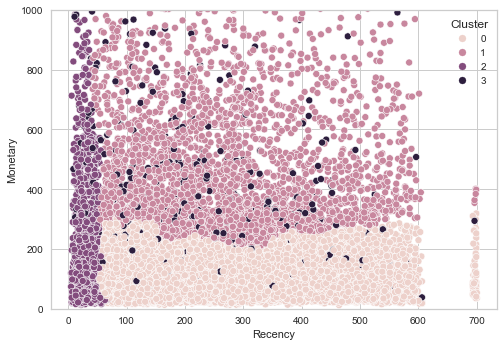

In [57]:
sns.scatterplot(
    df_agglo['Recency'],
    df_agglo['Monetary'],
    hue=df_agglo['Cluster'],
    legend='full')
plt.ylim(0, 1000)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


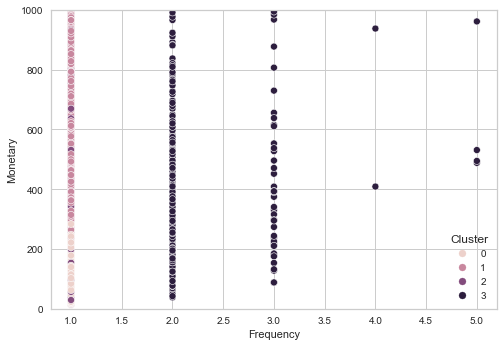

In [58]:
sns.scatterplot(
    df_agglo['Frequency'],
    df_agglo['Monetary'],
    hue=df_agglo['Cluster'],
    legend='full')
plt.ylim(0, 1000)
plt.show()

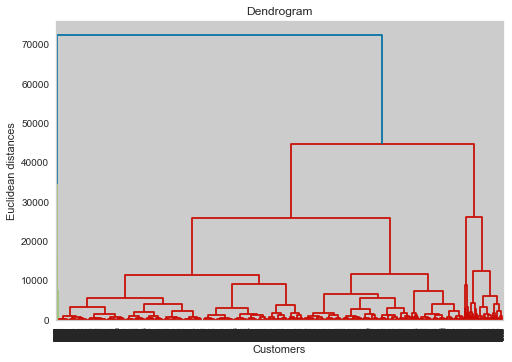

In [59]:
import scipy.cluster.hierarchy as sch
cluster_visualising = sch.dendrogram(
    sch.linkage(
        X_test.drop(
            columns='customer_unique_id'), method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## <a name ='C7'>DBSCAN</a>

In [60]:
max_score = (0, 0, 0)
for i in np.arange(0.9, 2.5, 0.1):
    for j in np.arange(3, 10, 1):
        clustering_model = DBSCAN(eps=i, min_samples=j)
        clustering_model.fit(X_scaled)
        predicted_labels = clustering_model.labels_
        k = silhouette_score(X_scaled,
                             clustering_model.labels_,
                             metric='euclidean')
        if k > max_score[2]:
            max_score = (i, j, k)
        print(
            'For eps =',
            i,
            ' and min_samples =',
            j,
            ' silhoutescore =',
            k,
            'and find',
            len(
            set(clustering_model.labels_)), 'clusters')

print(max_score)
print('best_params are', (max_score[0:2]), 'best_score is', max_score[2])

For eps = 0.9  and min_samples = 3  silhoutescore = 0.7005400348255872 and find 6 clusters
For eps = 0.9  and min_samples = 4  silhoutescore = 0.7005099587573609 and find 5 clusters
For eps = 0.9  and min_samples = 5  silhoutescore = 0.7004233259767496 and find 4 clusters
For eps = 0.9  and min_samples = 6  silhoutescore = 0.7004233259767496 and find 4 clusters
For eps = 0.9  and min_samples = 7  silhoutescore = 0.7003646790736622 and find 4 clusters
For eps = 0.9  and min_samples = 8  silhoutescore = 0.7003646790736622 and find 4 clusters
For eps = 0.9  and min_samples = 9  silhoutescore = 0.7002274945582899 and find 4 clusters
For eps = 1.0  and min_samples = 3  silhoutescore = 0.7006372632937453 and find 6 clusters
For eps = 1.0  and min_samples = 4  silhoutescore = 0.7006183356297967 and find 5 clusters
For eps = 1.0  and min_samples = 5  silhoutescore = 0.7006417413749061 and find 4 clusters
For eps = 1.0  and min_samples = 6  silhoutescore = 0.7006417413749061 and find 4 clusters

For eps = 2.0999999999999996  and min_samples = 4  silhoutescore = 0.7011733433238029 and find 4 clusters
For eps = 2.0999999999999996  and min_samples = 5  silhoutescore = 0.7011733433238029 and find 4 clusters
For eps = 2.0999999999999996  and min_samples = 6  silhoutescore = 0.7011733433238029 and find 4 clusters
For eps = 2.0999999999999996  and min_samples = 7  silhoutescore = 0.7011733433238029 and find 4 clusters
For eps = 2.0999999999999996  and min_samples = 8  silhoutescore = 0.7011733433238029 and find 4 clusters
For eps = 2.0999999999999996  and min_samples = 9  silhoutescore = 0.7011733433238029 and find 4 clusters
For eps = 2.1999999999999997  and min_samples = 3  silhoutescore = 0.7011733433238029 and find 4 clusters
For eps = 2.1999999999999997  and min_samples = 4  silhoutescore = 0.7011733433238029 and find 4 clusters
For eps = 2.1999999999999997  and min_samples = 5  silhoutescore = 0.7011733433238029 and find 4 clusters
For eps = 2.1999999999999997  and min_samples 

21:13: E122 16


For eps = 2.3999999999999995  and min_samples = 9  silhoutescore = 0.7020882750874511 and find 3 clusters
(2.3, 3, 0.7020882750874511)
best_params are (2.3, 3) best_score is 0.7020882750874511


In [61]:
df_dbscan = X_test.copy()

In [62]:
df_dbscan['Cluster'] = clustering_model.labels_

In [71]:
dt = time()
clustering_model = DBSCAN(eps=2.4, min_samples=9)
clustering_model.fit(X_scaled)
ft = time()
predicted_labels = clustering_model.labels_
t_db = ft-dt
k_db = silhouette_score(X_scaled,
                     clustering_model.labels_,
                     metric='euclidean')
print("Le silhouette score de DBSCAN est",k,"et le temps d'exécution est",ft-dt)

Le silhouette score de DBSCAN est 0.7026368400628227 et le temps d'exécution est 15.480046033859253


In [73]:
df_result = pd.DataFrame()
df_result['Algorithm'] = ['Kmeans','AgglomerativeClustering','DBSCAN']
df_result['Time'] = [t_kmeans,t_agglo,t_db]
df_result['Silhouette Score'] = [k_kmeans,k_agglo,k_db]

In [74]:
df_result

,Algorithm,Time,Silhouette Score
0,Kmeans,0.838373,0.378258
1,AgglomerativeClustering,61.750446,0.366449
2,DBSCAN,15.480046,0.702782


In [63]:
rfm_values(df_dbscan)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         242.0       1.0    203.0  22647
1         231.0       2.0    435.0    639
2         168.0       3.0    782.0     63

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


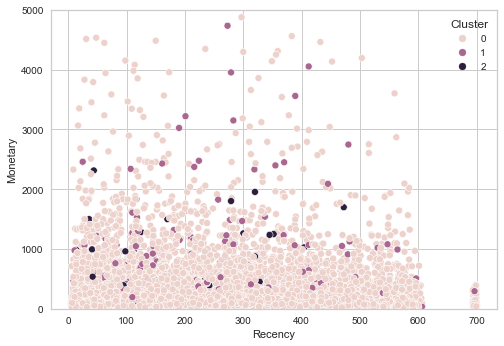

In [64]:
sns.scatterplot(
    df_dbscan['Recency'],
    df_dbscan['Monetary'],
    hue=df_dbscan['Cluster'],
    legend='full')
plt.ylim(0, 5000)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


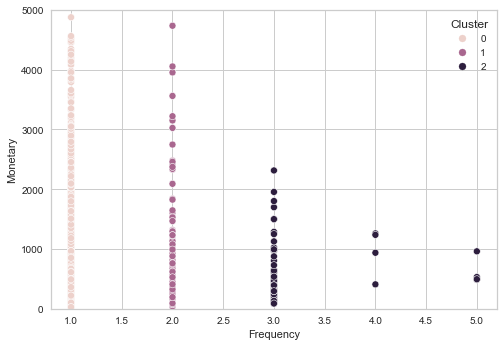

In [65]:
sns.scatterplot(
    df_dbscan['Frequency'],
    df_dbscan['Monetary'],
    hue=df_dbscan['Cluster'],
    legend='full')
plt.ylim(0, 5000)
plt.show()

Ici on voit que dbscan ne sépare les différents Cluster qu'en fonction de la fréquence d'achat. Ca n'a donc pas beaucoup d'intérêt. Ici, on va utiliser les résultats données par K-means car les résultats sont les plus utiles(ils sont très similaire à ceux obtenus avec AgglomerativeClustering)

In [66]:
df_rfm_review

,customer_unique_id,Recency,Frequency,Monetary,review
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4.0
2,0000f46a3911fa3c0805444483337064,542,1,86.22,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,4.0
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,5.0
...,...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,4134.84,5.0
93392,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58,4.0
93393,ffff371b4d645b6ecea244b27531430a,573,1,112.46,5.0
93394,ffff5962728ec6157033ef9805bacc48,124,1,133.69,5.0


In [67]:
Cluster = []
for i in df_rfm_review['customer_unique_id']:
    Cluster.append(
        int(
            df_rfm[df_rfm['customer_unique_id'] == i]['Cluster']))

## <a name ='C8'>Review et temps de livraison</a>

In [68]:
df_rfm

,customer_unique_id,Recency,Frequency,Monetary,Cluster,several
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,0,0
2,0000f46a3911fa3c0805444483337064,542,1,86.22,2,0
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2,0
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,3,0
...,...,...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,4134.84,3,0
93392,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58,0,0
93393,ffff371b4d645b6ecea244b27531430a,573,1,112.46,2,0
93394,ffff5962728ec6157033ef9805bacc48,124,1,133.69,0,0


In [69]:
df_rfm_review['Cluster'] = Cluster

In [70]:
df_rfm_review

,customer_unique_id,Recency,Frequency,Monetary,review,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,5.0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4.0,0
2,0000f46a3911fa3c0805444483337064,542,1,86.22,3.0,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,4.0,2
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,5.0,3
...,...,...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,4134.84,5.0,3
93392,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58,4.0,0
93393,ffff371b4d645b6ecea244b27531430a,573,1,112.46,5.0,2
93394,ffff5962728ec6157033ef9805bacc48,124,1,133.69,5.0,0


In [71]:
df_rfm_delivery['Cluster'] = Cluster

In [72]:
%pycodestyle_off
def rfm_values(df):
    df_new = df.groupby(['Cluster']).agg({
            'Recency': 'mean',
            'Frequency': 'mean',
            'review' : 'mean',
            'TimeToDeliveryinDays':'mean',
            'Monetary': ['mean', 'count']
        }).round(3)

    return df_new
%pycodestyle_on

In [73]:
rfm_values(df_rfm_delivery)

Recency Frequency review TimeToDeliveryinDays Monetary       
            mean      mean   mean                 mean     mean  count
Cluster                                                               
0        145.914     1.000  4.167               11.902   81.765  40300
1        225.649     2.112  4.161               12.321  488.146   2807
2        425.889     1.000  4.169               12.329  124.304  27541
3        194.256     1.000  3.908               13.893  520.516  22748